# **SUPPORT VECTOR MACHINE FOR PLAGIARISM DETECTION IN COMPUTER PROGRAMMING ASSIGNMENTS**

# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

# **DATA PREPROCESSING**

In [ ]:
features = pd.read_csv("plagiarism_student_dataset.csv")
print(features.shape)
features.head()

(2339, 16)


,roll_no,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste,op
0,A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441,0
1,A2016\student1016,37440.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,0.000000,NaN,NaN,NaN,NaN,0
2,A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455,1
3,A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774,1
4,A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160,0


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   roll_no                2339 non-null   object 
 1   total_time             2320 non-null   float64
 2   compiled               1871 non-null   float64
 3   compiled successfully  1848 non-null   float64
 4   ran_tests              1806 non-null   float64
 5   test_results           1648 non-null   float64
 6   modified               2328 non-null   float64
 7   add_lines              2007 non-null   float64
 8   change                 1878 non-null   float64
 9   remove_lines           1972 non-null   float64
 10  cps                    2240 non-null   float64
 11  paste_lines            1915 non-null   float64
 12  max_pastes             1915 non-null   float64
 13  average_test_results   1648 non-null   float64
 14  avg_paste              1915 non-null   float64
 15  op  

In [ ]:
features.isnull().sum()

roll_no                    0
total_time                19
compiled                 468
compiled successfully    491
ran_tests                533
test_results             691
modified                  11
add_lines                332
change                   461
remove_lines             367
cps                       99
paste_lines              424
max_pastes               424
average_test_results     691
avg_paste                424
op                         0
dtype: int64

In [ ]:
features.fillna(0,inplace=True)
features.shape

(2339, 16)

In [ ]:
features = features.drop_duplicates()
features.shape

(2339, 16)

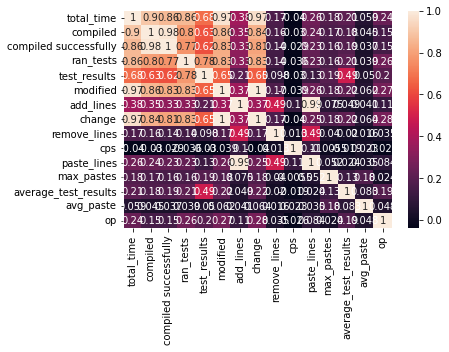

In [ ]:
plt.tick_params(labelsize=10)
sns.heatmap(features.corr(), annot=True)

In [ ]:
features.head()

,roll_no,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste,op
0,A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441,0
1,A2016\student1016,37440.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.000000,0.000000,0
2,A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455,1
3,A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774,1
4,A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160,0


In [ ]:
features.reset_index(inplace=True, drop=True)
features.head()

,roll_no,total_time,compiled,compiled successfully,ran_tests,test_results,modified,add_lines,change,remove_lines,cps,paste_lines,max_pastes,average_test_results,avg_paste,op
0,A2016\student1013,6894752.0,1441.0,1116.0,689.0,1349.0,38441.0,12365.0,32597.0,2023.0,0.003436,5202.0,120.0,1.957910,4.553441,0
1,A2016\student1016,37440.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.000000,0.0,0.0,0.000000,0.000000,0
2,A2016\student1021,9363152.0,2108.0,1278.0,787.0,1605.0,58550.0,19160.0,49003.0,6105.0,0.003997,7270.0,162.0,2.039390,5.147455,1
3,A2016\student1029,6949656.0,1775.0,1201.0,852.0,754.0,36461.0,15605.0,30332.0,2683.0,0.005040,7235.0,165.0,0.884977,4.840774,1
4,A2016\student1066,2784368.0,338.0,223.0,449.0,810.0,13924.0,6140.0,12169.0,369.0,0.004970,3988.0,139.0,1.804009,3.470160,0


In [ ]:
features_norm = features.copy()
features_norm.drop(['roll_no', 'op'], axis=1, inplace=True)

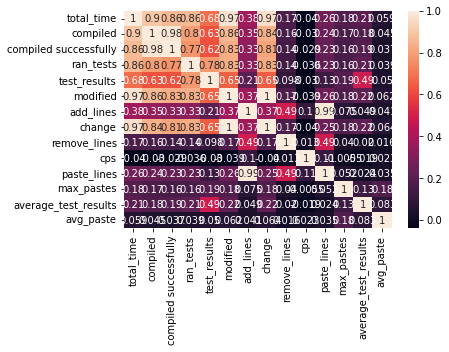

In [ ]:
plt.tick_params(labelsize=10)
sns.heatmap(features_norm.corr(), annot=True)

In [ ]:
X = features_norm.iloc[:, :]
y = features.iloc[:, 15]

In [ ]:
print(X[0:5])

   total_time  compiled  compiled successfully  ran_tests  test_results  \
0   6894752.0    1441.0                 1116.0      689.0        1349.0   
1     37440.0       0.0                    0.0        0.0           0.0   
2   9363152.0    2108.0                 1278.0      787.0        1605.0   
3   6949656.0    1775.0                 1201.0      852.0         754.0   
4   2784368.0     338.0                  223.0      449.0         810.0   

   modified  add_lines   change  remove_lines       cps  paste_lines  \
0   38441.0    12365.0  32597.0        2023.0  0.003436       5202.0   
1       1.0        0.0      0.0           8.0  0.000000          0.0   
2   58550.0    19160.0  49003.0        6105.0  0.003997       7270.0   
3   36461.0    15605.0  30332.0        2683.0  0.005040       7235.0   
4   13924.0     6140.0  12169.0         369.0  0.004970       3988.0   

   max_pastes  average_test_results  avg_paste  
0       120.0              1.957910   4.553441  
1         0.0     

In [ ]:
print(y[0:5])

0    0
1    0
2    1
3    1
4    0
Name: op, dtype: int64


# **BEFORE SAMPLING**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,shuffle=True,random_state=30)

In [ ]:
minmax = preprocessing.MinMaxScaler()
X_train = minmax.fit_transform(X_train)

In [ ]:
print(X_train.shape)
print(X_train)

(1403, 14)
[[1.03151549e-01 3.79557960e-02 2.56760448e-02 ... 1.49281238e-02
  2.30186667e-01 4.87765545e-02]
 [2.13800636e-01 1.11629208e-01 1.18956569e-01 ... 1.49281238e-02
  1.65517241e-01 2.78513065e-02]
 [1.25196413e-01 2.99356523e-02 2.84075389e-02 ... 8.66199779e-03
  1.02256983e-01 6.71265970e-02]
 ...
 [1.04451624e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.79884045e-01 1.47440082e-01 1.35208959e-01 ... 6.63472171e-03
  1.36517272e-01 2.24250003e-02]
 [9.45816417e-02 3.69299636e-02 3.48265501e-02 ... 3.14227792e-02
  3.69932886e-02 1.20470999e-01]]


In [ ]:
print(y_train.shape)
print(y_train)

(1403,)
180     0
11      1
1350    1
1463    0
1378    0
       ..
919     0
1164    0
500     0
421     1
1829    1
Name: op, Length: 1403, dtype: int64


In [ ]:
print(X_test.shape)
print(y_test.shape)

(936, 14)
(936,)


In [ ]:
clf = svm.SVC(kernel='rbf',class_weight='balanced')
clf.fit(X_train, y_train)

ypred_train = clf.predict(X_train)
print(X_train.shape)
print(y_train.shape)

(1403, 14)
(1403,)


In [ ]:
class_names = ['Not plagiarised', 'Plagiarised']

[[559 457]
 [ 32 355]]


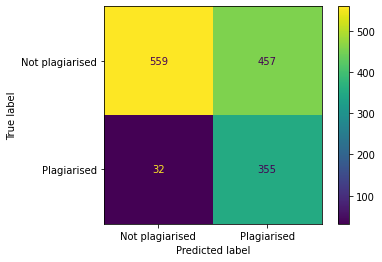

In [ ]:
print(confusion_matrix(y_train, ypred_train))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=class_names)
plt.show()

In [ ]:
X_test = minmax.fit_transform(X_test)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0
 0 1 1 0 0 1 0 1 1 0 1 1 

In [ ]:
print('------------- Evaluation on Test Data ------------------')
score_test = clf.score(X_test, y_test)
print('Accuracy Score: ', score_test)
print(classification_report(y_test, y_pred))
print('---------------------------------------------------------')
print('------------- Evaluation on Training Data ---------------')
score_train = clf.score(X_train, y_train)
print('Accuracy Score: ', score_train)
print(classification_report(y_train, ypred_train))
print('--------------------------------------------------------')

------------- Evaluation on Test Data ------------------
Accuracy Score:  0.6623931623931624
              precision    recall  f1-score   support

           0       0.94      0.56      0.70       658
           1       0.47      0.91      0.62       278

    accuracy                           0.66       936
   macro avg       0.70      0.73      0.66       936
weighted avg       0.80      0.66      0.67       936

---------------------------------------------------------
------------- Evaluation on Training Data ---------------
Accuracy Score:  0.6514611546685674
              precision    recall  f1-score   support

           0       0.95      0.55      0.70      1016
           1       0.44      0.92      0.59       387

    accuracy                           0.65      1403
   macro avg       0.69      0.73      0.64      1403
weighted avg       0.81      0.65      0.67      1403

--------------------------------------------------------


In [ ]:
print(X_test)

[[4.47054502e-02 1.90523941e-02 1.38605194e-02 ... 6.90000000e-03
  8.77777778e-02 1.64442173e-02]
 [4.71334841e-01 5.40862372e-01 3.56580099e-01 ... 7.41500000e-02
  8.57476636e-02 8.31506729e-03]
 [1.29861368e-01 1.53171221e-01 1.42398599e-01 ... 1.62000000e-02
  0.00000000e+00 7.61984375e-03]
 ...
 [6.76262887e-01 4.25169215e-01 3.21709950e-01 ... 1.84500000e-02
  1.38364462e-01 1.25463435e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.25897166e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


[[367 291]
 [ 25 253]]


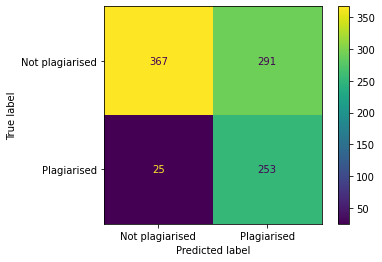

In [ ]:
print(confusion_matrix(y_test, y_pred))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=class_names)
plt.show()

In [ ]:
accuracy = format(clf.score(X_test, y_test) * 100, '.2f')
recall = format(recall_score(y_test, y_pred) * 100, '.2f')
f1_score1 = format(f1_score(y_test, y_pred) * 100, '.2f')

In [ ]:
print(f"Accuracy of the classifier is: {accuracy}%")
print(f"Recall Score of the classifier is: {recall}%")
print(f"F1 Score of the classifier is: {f1_score1}%")

Accuracy of the classifier is: 66.24%
Recall Score of the classifier is: 91.01%
F1 Score of the classifier is: 61.56%


# **SAVE CLASSIFIER**

In [ ]:
with open('clf_pkl_bs', 'wb') as files:
    pickle.dump(clf, files)
with open('clf_pkl_bs', 'rb') as f:
    classifier = pickle.load(f)
classifier.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# **AFTER SAMPLING**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,shuffle=True,random_state=30)


# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_plag = X[X.op==0]
plag = X[X.op==1]

not_plag_downsampled = resample(not_plag,
                                replace = False, # sample without replacement
                                n_samples = len(plag), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_plag_downsampled, plag])

# checking counts
downsampled.op.value_counts()

y_train = downsampled.op
X_train = downsampled.drop('op', axis=1)


In [ ]:
minmax = preprocessing.MinMaxScaler()
X_train = minmax.fit_transform(X_train)
print(X_train.shape)
print(X_train)

(774, 14)
[[5.84484393e-01 2.66098341e-01 2.59975816e-01 ... 4.63509031e-02
  8.85057471e-02 2.01984351e-01]
 [5.33697861e-01 2.27279647e-01 1.22531237e-01 ... 1.73239956e-02
  1.39862069e-01 1.14682499e-01]
 [5.37985257e-04 9.13381032e-04 1.20918984e-03 ... 1.84297825e-04
  0.00000000e+00 3.27091184e-02]
 ...
 [4.25587351e-02 1.91810017e-02 8.86739218e-03 ... 8.20125323e-03
  5.79672131e-02 8.11938282e-02]
 [3.23220175e-01 2.40675902e-01 1.99516324e-01 ... 6.63472171e-03
  1.36517272e-01 4.89245826e-02]
 [1.09226286e-01 6.02831481e-02 5.13905683e-02 ... 3.14227792e-02
  3.69932886e-02 2.62831361e-01]]


In [ ]:
print(y_train.shape)
print(y_train)

(774,)
703     0
2036    0
1437    0
1786    0
2203    0
       ..
1042    1
263     1
1845    1
421     1
1829    1
Name: op, Length: 774, dtype: int64


In [ ]:
print(X_test.shape)
print(y_test.shape)

(936, 14)
(936,)


In [ ]:
clf = svm.SVC(kernel='rbf',class_weight='balanced')
clf.fit(X_train, y_train)

ypred_train = clf.predict(X_train)
print(X_train.shape)
print(y_train.shape)

(774, 14)
(774,)


[[215 172]
 [ 26 361]]


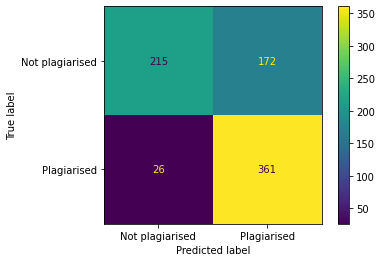

In [ ]:
print(confusion_matrix(y_train, ypred_train))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=class_names)
plt.show()

In [ ]:
X_test = minmax.fit_transform(X_test)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0
 0 1 1 0 0 1 0 1 1 0 1 1 

In [ ]:
print('------------- Evaluation on Test Data ------------------')
score_test = clf.score(X_test, y_test)
print('Accuracy Score: ', score_test)
print(classification_report(y_test, y_pred))
print('---------------------------------------------------------')
print('------------- Evaluation on Training Data ---------------')
score_train = clf.score(X_train, y_train)
print('Accuracy Score: ', score_train)
print(classification_report(y_train, ypred_train))
print('--------------------------------------------------------')

------------- Evaluation on Test Data ------------------
Accuracy Score:  0.6388888888888888
              precision    recall  f1-score   support

           0       0.96      0.51      0.66       658
           1       0.45      0.95      0.61       278

    accuracy                           0.64       936
   macro avg       0.71      0.73      0.64       936
weighted avg       0.81      0.64      0.65       936

---------------------------------------------------------
------------- Evaluation on Training Data ---------------
Accuracy Score:  0.7441860465116279
              precision    recall  f1-score   support

           0       0.89      0.56      0.68       387
           1       0.68      0.93      0.78       387

    accuracy                           0.74       774
   macro avg       0.78      0.74      0.73       774
weighted avg       0.78      0.74      0.73       774

--------------------------------------------------------


In [ ]:
print(X_test)

[[4.47054502e-02 1.90523941e-02 1.38605194e-02 ... 6.90000000e-03
  8.77777778e-02 1.64442173e-02]
 [4.71334841e-01 5.40862372e-01 3.56580099e-01 ... 7.41500000e-02
  8.57476636e-02 8.31506729e-03]
 [1.29861368e-01 1.53171221e-01 1.42398599e-01 ... 1.62000000e-02
  0.00000000e+00 7.61984375e-03]
 ...
 [6.76262887e-01 4.25169215e-01 3.21709950e-01 ... 1.84500000e-02
  1.38364462e-01 1.25463435e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.25897166e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


[[333 325]
 [ 13 265]]


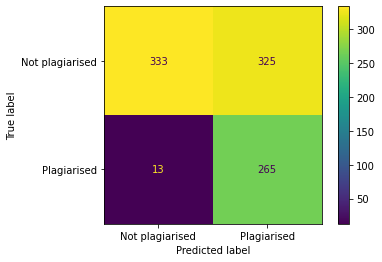

In [ ]:
print(confusion_matrix(y_test, y_pred))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=class_names)
plt.show()

In [ ]:
accuracy = format(clf.score(X_test, y_test) * 100, '.2f')
recall = format(recall_score(y_test, y_pred) * 100, '.2f')
f1_score = format(f1_score(y_test, y_pred) * 100, '.2f')

In [ ]:
print(f"Accuracy of the classifier is: {accuracy}%")
print(f"Recall Score of the classifier is: {recall}%")
print(f"F1 Score of the classifier is: {f1_score}%")

Accuracy of the classifier is: 63.89%
Recall Score of the classifier is: 95.32%
F1 Score of the classifier is: 61.06%


# **SAVE CLASSIFIER**

In [ ]:
with open('clf_pkl', 'wb') as files:
    pickle.dump(clf, files)
with open('clf_pkl', 'rb') as f:
    classifier = pickle.load(f)
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,